In [9]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sympy import *
import scipy as sp

In [10]:
C_m  =   1.0
g_Na = 120.0
g_K  =  36.0
g_L  =   0.3
E_Na =  50.0
E_K  = -77.0
E_L  = -54.387

In [11]:
t = sp.arange(0.0, 450.0, 0.01)

/Users/anathayna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  """Entry point for launching an IPython kernel.


In [12]:
def alpha_m(self, V):
    return 0.1*(V+40.0)/(1.0 - sp.exp(-(V+40.0) / 10.0))

def beta_m(self, V):
    return 4.0*sp.exp(-(V+65.0) / 18.0)

In [13]:
def alpha_h(self, V):
    return 0.07*sp.exp(-(V+65.0) / 20.0)

def beta_h(self, V):
    return 1.0/(1.0 + sp.exp(-(V+35.0) / 10.0))

In [14]:
def alpha_n(self, V):
    return 0.01*(V+55.0)/(1.0 - sp.exp(-(V+55.0) / 10.0))

def beta_n(self, V):
    return 0.125*sp.exp(-(V+65) / 80.0)

In [15]:
def I_Na(self, V, m, h):
    return self.g_Na * m**3 * h * (V - self.E_Na)

def I_K(self, V, n):
    return self.g_K  * n**4 * (V - self.E_K)

def I_L(self, V):
    return self.g_L * (V - self.E_L)

def I_inj(self, t):
    return 10*(t>100) - 10*(t>200) + 35*(t>300) - 35*(t>400)

In [16]:
def dALLdt(X, t, self):
    V, m, h, n = X

    dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
    dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
    dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
    dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
    return dVdt, dmdt, dhdt, dndt

In [20]:
def Main(self):

    X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.32], self.t, args=(self,))
        
    V = X[:,0]
    m = X[:,1]
    h = X[:,2]
    n = X[:,3]
        
    ina = self.I_Na(V, m, h)
    ik = self.I_K(V, n)
    il = self.I_L(V)

    plt.figure()

    plt.subplot(4,1,1)
    plt.title('Propagação do Potencial de Ação em Neurônios')
    plt.plot(self.t, V, 'k')
    plt.ylabel('V (mV)')

    plt.show()

/Users/anathayna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/anathayna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/anathayna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/anathayna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/anathayna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/anathayna/opt/anaconda3/lib/python3.7/site-packages/ipyker

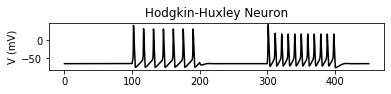

In [21]:
if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()